## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [4]:
#answer below:
absent.drop(columns=['ID', 'Body mass index', 'Month of absence'], inplace=True)

num_cols = ['Transportation expense', 'Distance from Residence to Work','Service time', 'Age',
           'Work load Average/day ','Hit target','Weight', 'Height', 'Absenteeism time in hours']
cat_cols = list(absent.columns)

for col in num_cols:
        cat_cols.remove(col)

print(cat_cols)
print(num_cols)

['Reason for absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 'Absenteeism time in hours']


Scale the independent variables using the standard scaler

In [5]:
# answer below:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = absent.drop('Absenteeism time in hours', axis=1)
y = absent['Absenteeism time in hours']
num_cols.remove('Absenteeism time in hours')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

scale = StandardScaler()
one_hot = OneHotEncoder(drop='first', sparse=False)

preprocessor = ColumnTransformer(transformers=[('num', scale, num_cols), 
                                              ('cat', one_hot, cat_cols)])
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

one_hot_featuers = preprocessor.named_transformers_['cat'].get_feature_names()
all_features = num_cols + list(one_hot_featuers)

pd.DataFrame(X_train_proc, index=X_train.index, columns=all_features).head()


,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,x0_1,x0_2,...,x5_2,x5_3,x5_4,x6_1,x7_1,x8_1,x8_2,x8_4,x8_5,x8_8
518,0.036677,-0.223918,-0.794374,-1.276233,0.350458,-0.953328,-0.779887,-0.531306,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0,0.985212,0.457973,0.125468,-0.506541,-0.822650,0.637194,0.852362,-0.048646,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
480,-0.645083,1.480811,1.275271,0.263151,-0.557387,-0.423154,0.774635,-0.370419,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
388,-0.645083,1.480811,1.275271,0.263151,-0.505049,0.372107,0.774635,-0.370419,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
580,-0.645083,-0.223918,-0.794374,-0.968356,1.093158,0.372107,-1.790327,-0.209533,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [6]:
# answer below:

from sklearn.svm import SVR

svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_proc, y_train)

print(
    f'Linear train: {svr_linear.score(X_train_proc, y_train)}\n'
    f'Linear test: {svr_linear.score(X_test_proc, y_test)}\n'
)


Linear train: 0.08757420354334655
Linear test: 0.05066043077911342



If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [7]:
# answer below:
from sklearn.model_selection import GridSearchCV

svr = SVR()

grid_params = {
    'epsilon':np.logspace(-2,2,5),
    'kernel':['linear', 'poly', 'rbf'],
    'C':np.logspace(-2,3,6)
}

grid = GridSearchCV(svr, grid_params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_proc, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'epsilon': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [11]:
from sklearn.metrics import mean_squared_error

train_pred = grid.predict(X_train_proc)
test_pred = grid.predict(X_test_proc)

print(
    f'best epsilon: {grid.best_estimator_.epsilon}\n'
    f'best kernal: {grid.best_estimator_.kernel}\n'
    f'best C: {grid.best_estimator_.C}\n'
    f'train RMSE: {mean_squared_error(train_pred, y_train, squared=False)}\n'
    f'test RMSE: {mean_squared_error(test_pred, y_test, squared=False)}\n'
)

best epsilon: 0.01
best kernal: poly
best C: 10.0
train RMSE: 11.334791832608982
test RMSE: 14.335216715156404



Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

Text(0.5, 1.0, 'Test')

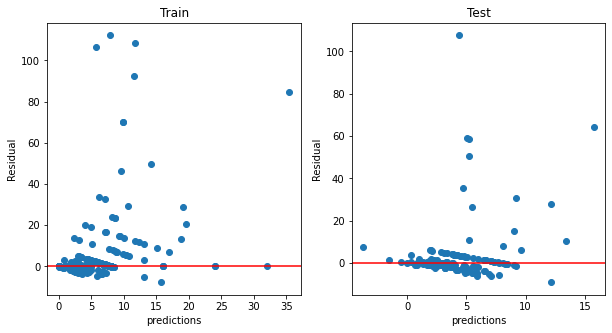

In [9]:
# answer below:
res_train = y_train - train_pred
res_test = y_test - test_pred

plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.scatter(train_pred, res_train)
plt.axhline(color='r')
plt.xlabel('predictions')
plt.ylabel('Residual')
plt.title('Train')

plt.subplot(1,2,2)
plt.scatter(test_pred, res_test)
plt.axhline(color='r')
plt.xlabel('predictions')
plt.ylabel('Residual')
plt.title('Test')


In [ ]:
# Training RMSE is lower than the KNN regressor but the test RMSE is higher
# So based on RMSE it looks like the SVR is overfitting more. 
# The residual plots look similar for the test set compared to the KNN model.